In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("/content/Titanic_visu.xlsx")

7. Draw the line plot between Age and Concession. Observe the trend line.


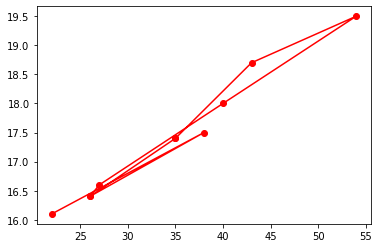

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['Age'].head(10), df['Concession'].head(10), marker = 'o', color = 'red')

8. Draw the scatter plot between Fare and New_Fare. Observe the correlation

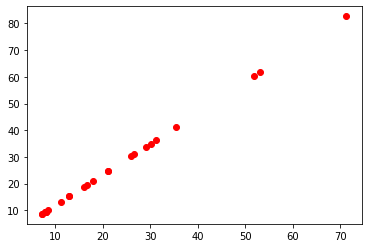

In [ ]:
x = df['Fare']
y = df['New_Fare']
plt.scatter(x, y, c = 'red')
#it is a positive correlation

9. Draw the scatter plot between Age and Fare. Observe the correlation.

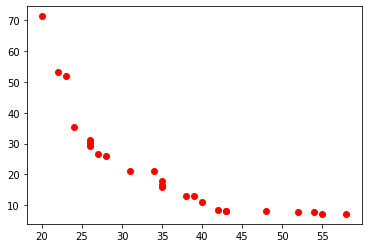

In [ ]:
x = df['Age']
y = df['Fare']
plt.scatter(x, y, c = 'red')
#it is a positive correlation

10. Draw the box plot to show the statistical summary of Age column and verify with
describe().

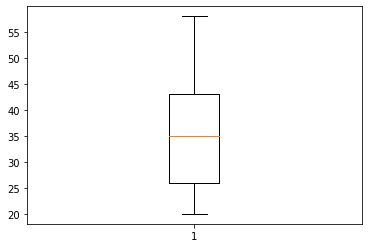

In [ ]:
plt.boxplot(df['Age']);

11. Draw the histogram plot for Concession column

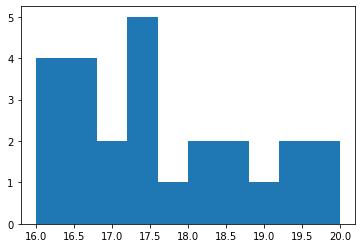

In [ ]:
plt.hist(df["Concession"]);

12. Draw the histogram plot for Concession column with bin value and PDF.

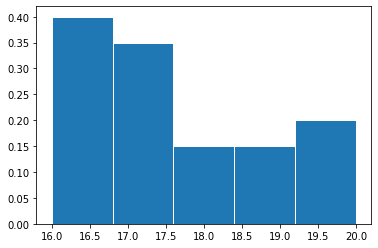

In [ ]:
plt.hist(df["Concession"],edgecolor = 'white',bins = 5,density=True);

Group - 1:

Develop a KNN classification model for the Social_Network dataset using the scikit-learn

a. Use the columns: 'Gender', 'Age', 'EstimatedSalary' as the independent variables

b. Use the target variable as 'Purchased' (Yes-Y, No-N)

c. Encode the categorical value of the target column to numerical value

d. Divide the data into training (75%) and testing set (25%)

e. Perform the classification with K=3

f. Analyse the performance of the classifier with various performance measures such as
confusion matrix, accuracy, recall, precision, specificity, 
f-score, Receiver operating
characteristic (ROC) curve and Area Under Curve (AUC) score. 

g. Perform feature scaling on independent variables and analyse the performance

h. Change the value of K in KNN with 5,7,9,11 and tabulate the various TP, TN, accuracy, f-score and AUC score obtained. K value TP TN Accuracy f-score AUC score

i. Analyse for which K value, the classification algorithm provides better performance.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
df.dropna(inplace = True)

In [ ]:
social_networks = pd.read_csv("/content/Social_Network.csv")

In [ ]:
social_networks.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15668575,0,26,43000,No
1,15603246,0,27,57000,No
2,15598044,0,27,84000,No
3,15727311,0,35,65000,No
4,15570769,0,26,80000,No


a. Use the columns: 'Gender', 'Age', 'EstimatedSalary' as the independent variables

In [ ]:
x=social_networks.loc[:,["Gender", "Age", "EstimatedSalary"]].values
print(x)

[[    0    26 43000]
 [    0    27 57000]
 [    0    27 84000]
 ...
 [    1    47 23000]
 [    1    60 42000]
 [    1    51 23000]]


b. Use the target variable as 'Purchased' (Yes-Y, No-N)

In [ ]:
y = social_networks.loc[:, 'Purchased'].values
print(y)

['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 

c. Encode the categorical value of the target column to numerical value

In [ ]:
social_networks['Purchased']= social_networks['Purchased'].replace({'M':1, 'B':0})
social_networks['Purchased']

0       No
1       No
2       No
3       No
4       No
      ... 
395    Yes
396    Yes
397    Yes
398    Yes
399    Yes
Name: Purchased, Length: 400, dtype: object

d. Divide the data into training (75%) and testing set (25%)

In [ ]:
social_networks['Purchased']= social_networks['Purchased'].replace({'M':1, 'B':0}
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
print(x_train)

[[     0     30  79000]
 [     1     49  89000]
 [     1     35  53000]
 [     0     22  63000]
 [     0     46  96000]
 [     0     47 107000]
 [     0     34  72000]
 [     1     38  71000]
 [     0     48 138000]
 [     1     38  61000]
 [     0     37  57000]
 [     1     57  60000]
 [     0     44  39000]
 [     1     38  51000]
 [     1     28  79000]
 [     0     35  60000]
 [     0     54  26000]
 [     1     35  75000]
 [     1     23  63000]
 [     1     47  34000]
 [     0     29  83000]
 [     1     21  72000]
 [     1     60  34000]
 [     1     49  65000]
 [     1     35  91000]
 [     0     34  25000]
 [     0     41  72000]
 [     0     33  51000]
 [     0     48  30000]
 [     1     51  23000]
 [     0     49  36000]
 [     0     52  38000]
 [     1     46 117000]
 [     0     45 131000]
 [     1     42 149000]
 [     0     59  88000]
 [     0     59  42000]
 [     1     25  33000]
 [     0     46  74000]
 [     1     36 118000]
 [     0     27  54000]
 [     1     22 

e. Perform the classification with K=3

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

y_pred = knn.predict(x_train)
print(y_pred)
print(y_test)

['No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No'
 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No'
 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No'
 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes'
 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No'
 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No'
 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No'

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)

tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1_score = 2 * precision * recall / (precision + recall)

y_pred_proba = knn.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Confusion Matrix:\n",conf_matrix)
print("Accuracy: ",accuracy)
print("Specificity: ",specificity)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)
print("Classification Report:\n",report)
print("AUC score: ",auc_score)
print("True positive: ",tp)
print("True negative: ",tn)

ValueError: ignored